# Linear Programming with Python

Optimization deals with selecting the best option among a number of possible choices that are feasible or don't violate constraints. Python can be used to optimize parameters in a model to best fit data, increase profitability of a potential engineering design, or meet some other type of objective that can be described mathematically with variables and equations. Mathematical optimization problems may include equality constraints (e.g. =), inequality constraints (e.g. <, <=, >, >=), objective functions, algebraic equations, differential equations, continuous variables, discrete or integer variables, etc. A general statement of an optimization problem with nonlinear objectives or constraints is given by the following:

$$\begin{align}\mathrm{minimize} \quad & c\,x \\ \mathrm{subject\;to}\quad & A \, x=b \\ & A \, x>b \end{align}$$

Two popular numerical methods for solving linear programming problems are the Simplex method and an Interior Point method.


### Exercise: Soft Drink Production

A simple production planning problem is given by the use of two ingredients A and B that produce products 1 and 2. The available supply is A=30 units and B=44 units. For production it requires:

* 3 units of A and 8 units of B to produce Product 1
* 6 units of A and 4 units of B to produce Product 2

There are at most 5 units of Product 1 and 4 units of Product 2. Product 1 can be sold for 100 and Product 2 can be sold for 125. The objective is to maximize the profit for this production problem.

For this problem determine:

1. A potential feasible solution
2. Identify the constraints on the contour plot
3. Mark the set of feasible solutions on the contour plot
4. Identify the minimum objective feasible solution
5. Identify the maximum objective feasible solution
6. Use a solver to find a solution

<img src="pictures/lp_contour.png">

A contour plot can be used to explore the optimal solution. In this case, the black lines indicate the upper and lower bounds on the production of 1 and 2. In this case, the production of 1 must be greater than 0 but less than 5. The production of 2 must be greater than 0 but less than 4. There are at most 30 units of A and 44 units of B ingredients that are available to produce products 1 and 2.

##### Method 1: Equations and Objective

Using equations and an objective function is good for small problems because it is a readable optimization problem and is thereby easy to modify.

In [5]:
from gekko import GEKKO
m = GEKKO()
x1 = m.Var(lb=0, ub=5) # Product 1
x2 = m.Var(lb=0, ub=4) # Product 2
m.Maximize(100*x1+125*x2) # Profit function
m.Equation(3*x1+6*x2<=30) # Units of A
m.Equation(8*x1+4*x2<=44) # Units of B
m.solve(disp=False)
p1 = x1.value[0]; p2 = x2.value[0]
print ('Product 1 (x1): ' + str(p1))
print ('Product 2 (x2): ' + str(p2))
print ('Profit        : ' + str(100*p1+125*p2))

Product 1 (x1): 4.0
Product 2 (x2): 3.0000000014
Profit        : 775.000000175


##### Method 2: Dence Matrices

For large-scale problems, a matrix forms is best because it simplifies the problem description and improves the speed of solution. Scipy.optimize.linprog is one of the available packages to solve Linear programming problems. Another good linear and mixed integer programming Python package is Pulp with interfaces to dedicate mixed integer linear programming solvers.

In [6]:
# solve with SciPy
from scipy.optimize import linprog
c = [-100, -125]
A = [[3, 6], [8, 4]]
b = [30, 44]
x0_bounds = (0, 5)
x1_bounds = (0, 4)
res = linprog(c, A_ub=A, b_ub=b, bounds=(x0_bounds, x1_bounds), options={"disp": True})
print(res)

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 -225.0              
0.1954734975464     0.1954734975464     0.1954734975464     0.8151046518637  0.1954734975464     -432.5883006987     
0.01672002013432    0.01672002013432    0.01672002013432    0.9299492396436  0.0167200201343     -734.2508248452     
1.120328802383e-05  1.120328880566e-05  1.120328880574e-05  0.9994467202048  1.120331756492e-05  -774.9715291935     
5.603092882434e-10  5.603052419316e-10  5.603050721805e-10  0.9999499874318  5.601703229586e-10  -774.999998576      
Optimization terminated successfully.
         Current function value: -774.999999 
         Iterations: 4
     con: array([], dtype=float64)
     fun: -774.9999985760445
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([5.37022942e-08, 8.46267696e-08])
  status: 

##### Method 3: Sparse Matrices 

Sparse matrices are faster and use less memory for very large-scale problems with many zeros in A, b, and c.

In [7]:
# solve with GEKKO and sparse matrices
import numpy as np
from gekko import GEKKO
m = GEKKO(remote=False)
# [[row indices],[column indices],[values]]
A_sparse = [[1,1,2,2],[1,2,1,2],[3,6,8,4]]
# [[row indices],[values]]
b_sparse = [[1,2],[30,44]]
x = m.axb(A_sparse,b_sparse,etype='<',sparse=True)
# [[row indices],[values]]
c_sparse = [[1,2],[100,125]]
m.qobj(c_sparse,x=x,otype='max',sparse=True)
x[0].lower=0; x[0].upper=5
x[1].lower=0; x[1].upper=4
m.solve(disp=True)
print ('Product 1 (x1): ' + str(x[0].value[0]))
print ('Product 2 (x2): ' + str(x[1].value[0]))
print ('Profit        : ' + str(-m.options.objfcnval))

 ----------------------------------------------------------------
 APMonitor, Version 0.9.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  2
   Constants    :  0
   Variables    :  2
   Intermediates:  0
   Connections  :  4
   Equations    :  0
   Residuals    :  0
 
 Number of state variables:    2
 Number of total equations: -  2
 Number of slack variables: -  0
 ---------------------------------------
 Degrees of freedom       :    0
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
     

##### Contour Plot

Below are the source files for generating the contour plots in Python. The linear program is solved with the APM model through a web-service while the contour plot is generated with the Python package Matplotlib.

In [8]:
from gekko import GEKKO

# Make solver object
m = GEKKO()

# Variables
x1 = m.Var(value=0 , lb=0 , ub=5 , name='x1') # Product 1
x2 = m.Var(value=0 , lb=0 , ub=4 , name='x2') # Product 2
profit = m.Var(value=1 , name='profit')

# Profit function
m.Obj(-profit)
m.Equation(profit==100*x1+125*x2)
m.Equation(3*x1+6*x2<=30)
m.Equation(8*x1+4*x2<=44)

# Solve
m.solve()

# Print
print ('')
print ('--- Results of the Optimization Problem ---')
print ('Product 1 (x1): ' + str(x1[0]))
print ('Product 2 (x2): ' + str(x2[0]))
print ('Profit: ' + str(profit[0]))

apm 78.23.238.168_gk_model5 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            4
   Residuals    :            4
 
 Number of state variables:              5
 Number of total equations: -            3
 Number of slack variables: -            2
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program con

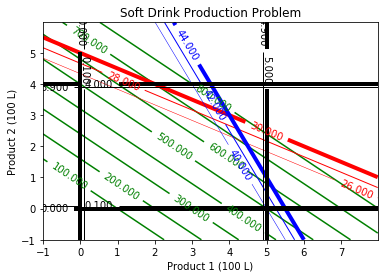

In [9]:

## Generate a contour plot
# Import some other libraries that we'll need
# matplotlib and numpy packages must also be installed
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Design variables at mesh points
x = np.arange(-1.0, 8.0, 0.02)
y = np.arange(-1.0, 6.0, 0.02)
x1, x2 = np.meshgrid(x,y)

# Equations and Constraints
profit = 100.0 * x1 + 125.0 * x2
A_usage = 3.0 * x1 + 6.0 * x2
B_usage = 8.0 * x1 + 4.0 * x2

# Create a contour plot
plt.figure()

# Weight contours
lines = np.linspace(100.0,800.0,8)
CS = plt.contour(x1,x2,profit,lines,colors='g')
plt.clabel(CS, inline=1, fontsize=10)

# A usage < 30
CS = plt.contour(x1,x2,A_usage,[26.0, 28.0, 30.0],colors='r',linewidths=[0.5,1.0,4.0])
plt.clabel(CS, inline=1, fontsize=10)

# B usage < 44
CS = plt.contour(x1, x2,B_usage,[40.0,42.0,44.0],colors='b',linewidths=[0.5,1.0,4.0])
plt.clabel(CS, inline=1, fontsize=10)

# Container for 0 <= Product 1 <= 500 L
CS = plt.contour(x1, x2,x1 ,[0.0, 0.1, 4.9, 5.0],colors='k',linewidths=[4.0,1.0,1.0,4.0])
plt.clabel(CS, inline=1, fontsize=10)

# Container for 0 <= Product 2 <= 400 L
CS = plt.contour(x1, x2,x2 ,[0.0, 0.1, 3.9, 4.0],colors='k',linewidths=[4.0,1.0,1.0,4.0])
plt.clabel(CS, inline=1, fontsize=10)

# Add some labels
plt.title('Soft Drink Production Problem')
plt.xlabel('Product 1 (100 L)')
plt.ylabel('Product 2 (100 L)')
plt.savefig('pictures/contour.png')

# Show the plots
plt.show()